# Testing scripts

A simple notebook to test the data generators and the simulators


In [2]:
%matplotlib inline
import math
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import deque
import copy
import random


In [3]:
import generator 
import detector
import utilities

# Generators

## Pydata scripts testing

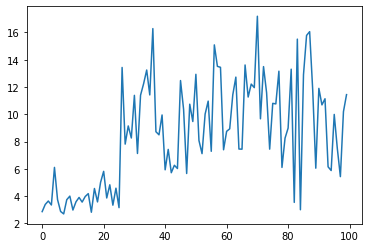

In [4]:
gen = generator.ChangingDistributionGenerator(stats.norm, {"loc":4,"scale":1}, stats.norm, {"loc":10,"scale":3},25)

vals = np.zeros(100)
for i in range(100):
    vals[i] = gen.get()

plt.plot(vals)

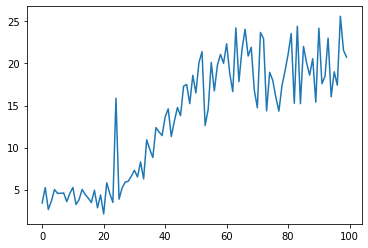

In [5]:
gen2 = generator.DriftGenerator(stats.norm, {'loc': 4, 'scale':1}, stats.norm, {'loc':20, 'scale': 3}, 25, 30)
vals2 = np.zeros(100)
for i in range(100):
    vals2[i] = gen2.get()
    
plt.plot(vals2)

## Bayesian notebook testing

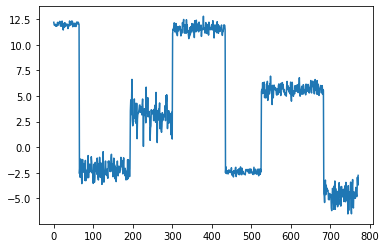

In [6]:
data = generator.generate_normal_time_series(7, 50, 200)
#input: num, minl=50, maxl=1000
plt.plot(data)

# Detectors 

In [7]:
import detector
from collections import deque

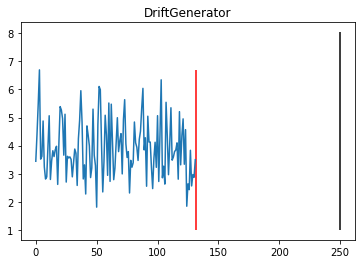

118.0

In [8]:
detect = detector.ThreshDetector(0.2, 10)
gen2 = generator.DriftGenerator(stats.norm, {'loc': 4, 'scale':1}, stats.norm, {'loc':20, 'scale': 3}, 250, 100)
simulator = detector.Simulator([gen2], detect, 1200)

simulator.run(plot=True)

In [9]:
detect = detector.WindowedMonteCarloDetector(100, 10, 1000, 0.25)
gen3 = generator.DriftGenerator(stats.norm, {'loc': 4, 'scale':1}, stats.norm, {'loc':20, 'scale': 3}, 250, 100)

simulator = detector.Simulator([gen2, gen3], detect, 1200)

simulator.run(plot=True)

NameError: name 'hdi' is not defined